### Seminar #5. Regression

Agenda
- Sci-kit learn
- Linear regression
- Gradient descent
- Ridge regression

- Random Forest

- Band gap dataset 




### Part 1. Linear regression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Task 1
The solution for a linear regression problem is given by the following formula:
$W = (X^TX)^{-1}X^Ty$

Note: Don't forget to append bias vector to $x$ matrix

Compare your solution with scipy.stats.linregress method

In [ ]:

def solve(x, y):
    """
    This function finds best fit parameters for a linear regression problem

    Params:
    ------
    X: np.array
        feature matrix

    y: np.array
        labels

    Returns:
    -------
    Best fit parameters
    
    """
    ### your code ###
    pass


x = np.linspace(10, 30, 100)
y = 3 * x + 50 + np.random.normal(0,  10.0, len(x))

W = solve(x, y)

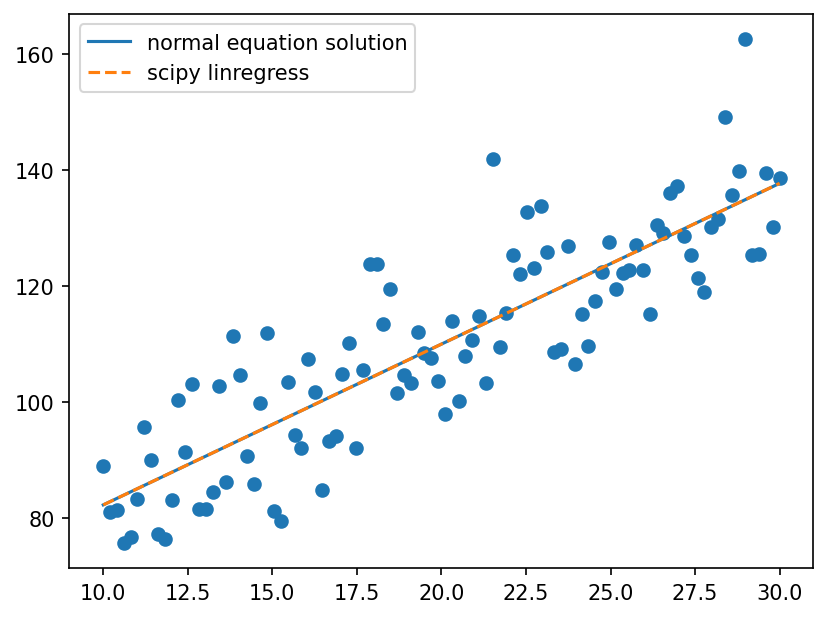

In [75]:
def line(x, w0, w1):
    return w0 + x * w1

res = linregress(x, y)

plt.figure(dpi = 150)
plt.plot(x, line(x, *W), label = 'normal equation solution')
plt.plot(x, res.slope * x + res.intercept,  label = 'scipy linregress', linestyle = '--')
plt.scatter(x, y)
plt.legend()

#### Task 2: MSE
Write a function that calculates mean squared error. Calculate the MSE error for the model obtained in Task #1.


In [ ]:
def MSE(y_pred, y_true):
    pass 

#### Task #3: Gradient descent

Implement gradient descent algorithm. Compare obtained model with the normal equation solution.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/Cost-Function.jpg" height="400">

In [ ]:
def h(X, theta):
    pass

def J(X, y, theta):
    pass

def step(X, y, theta, lr): 
    pass


m = len(x)
bias_vector = np.ones((m, 1))
X = np.reshape(x, (m, 1))
X = np.append(bias_vector, X, axis=1)
theta = np.zeros(2)

theta_current = np.zeros(2)
costs = []
for i in range(100000):
    theta_current = step(X, y, theta_current, 0.001)
    costs.append(J(X, y, theta_current))    

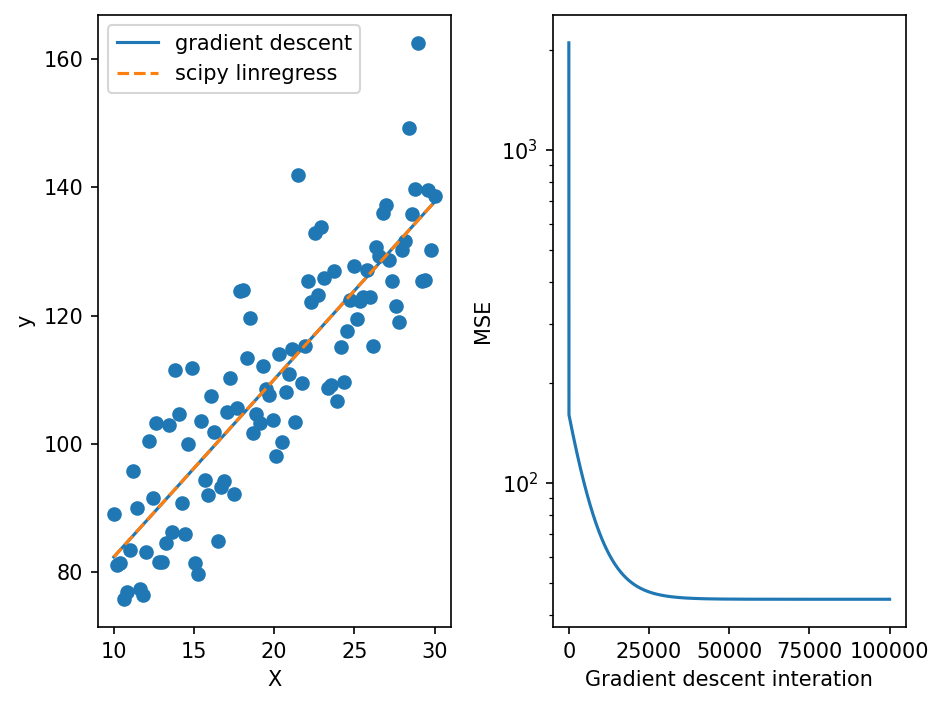

In [78]:
def line(x, w0, w1):
    return w0 + x * w1
res = linregress(x, y)

fig, (ax1, ax2) = plt.subplots(dpi = 150, ncols = 2)
ax1.plot(x, line(x, *theta_current), label = 'gradient descent')
ax1.plot(x, res.slope * x + res.intercept,  label = 'scipy linregress', linestyle = '--')
ax1.scatter(x, y)
ax1.legend()
ax1.set_xlabel('X')
ax1.set_ylabel('y')

ax2.plot(costs)
ax2.set_ylabel('MSE')
ax2.set_xlabel('Gradient descent interation')
ax2.set_yscale('log')
plt.tight_layout()

In [79]:
MSE(x, line(x, *theta_current)), MSE(x, line(x, res.intercept, res.slope))

(8213.190275910256, 8213.376807171679)

### Part 2. Sklearn

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [84]:
# download files
!mkdir data
!wget -O./data/eg_double_perovskites.csv https://raw.githubusercontent.com/dembart/intro-to-materials-informatics/refs/heads/main/data/seminar05/eg_double_perovskites.csv

mkdir: data: File exists
--2025-09-24 12:38:34--  https://raw.githubusercontent.com/dembart/intro-to-materials-informatics/refs/heads/main/data/seminar05/eg_double_perovskites.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1313139 (1,3M) [text/plain]
Saving to: ‘./data/eg_double_perovskites.csv’

./data/eg_double_pe 100%[===================>]   1,25M  1,10MB/s    in 1,1s    

2025-09-24 12:38:36 (1,10 MB/s) - ‘./data/eg_double_perovskites.csv’ saved [1313139/1313139]



In [86]:
data = pd.read_csv('data/eg_double_perovskites.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   functional group  5152 non-null   object 
 1   A                 5152 non-null   object 
 2   A_OS              5152 non-null   int64  
 3   A'                5152 non-null   object 
 4   A'_OS             5152 non-null   int64  
 5   A_HOMO-           5152 non-null   float64
 6   A_HOMO+           5152 non-null   float64
 7   A_IE-             5152 non-null   float64
 8   A_IE+             5152 non-null   float64
 9   A_LUMO-           5152 non-null   float64
 10  A_LUMO+           5152 non-null   float64
 11  A_X-              5152 non-null   float64
 12  A_X+              5152 non-null   float64
 13  A_Z_radii-        5152 non-null   float64
 14  A_Z_radii+        5152 non-null   float64
 15  A_e_affin-        5152 non-null   float64
 16  A_e_affin+        5152 non-null   float64


In [87]:
# drop metals
data = data[data.Insulator == 1]

In [88]:
# drop non-numerical data
X = data.drop(['functional group', "A", "A'", "B'", "PBE band gap", "Bi"], axis = 1) # features
y = data['PBE band gap'] # label (target)

In [129]:
# split data into train and test subsamples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle=True)

In [130]:
# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

[Feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html) through standardization, also called Z-score normalization, is an important preprocessing step for many machine learning algorithms. It involves rescaling each feature such that it has a standard deviation of 1 and a mean of 0



<center><img src="https://media.licdn.com/dms/image/C4E12AQFPqF6qfXYOvQ/article-cover_image-shrink_600_2000/0/1624324925880?e=2147483647&v=beta&t=C5ghUcvwlIFvEqyfLrB5bb4cL5z4mFYwQxzZscULq8c" height="175"></center>

- Scaling guarantees that all features are on a comparable scale and have comparable ranges

- Algorithm performance improvement: When the features are scaled, several machine learning methods, including gradient descent-based algorithms, distance-based algorithms (such k-nearest neighbours), and support vector machines, perform better or converge more quickly

- Preventing numerical instability: Numerical instability can be prevented by avoiding significant scale disparities between features. 

- Without scaling, bigger scale features could dominate the learning, producing skewed outcomes


https://www.geeksforgeeks.org/ml-feature-scaling-part-2/


<center><img src="https://media.licdn.com/dms/image/C4D12AQGQecHw_HVgWg/article-cover_image-shrink_720_1280/0/1520101785920?e=2147483647&v=beta&t=D8LwZVwrXHmbOsR4KLSKkTc_88ZQnT38pCxk8EKpKcE" height="300"></center>


In [156]:
# define model
model = Ridge(alpha = .1)

# fit model on train data
model.fit(X_train_scaled, y_train)

Ridge(alpha=0.1)

In [157]:
# make predictions
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

0.37053984908496407

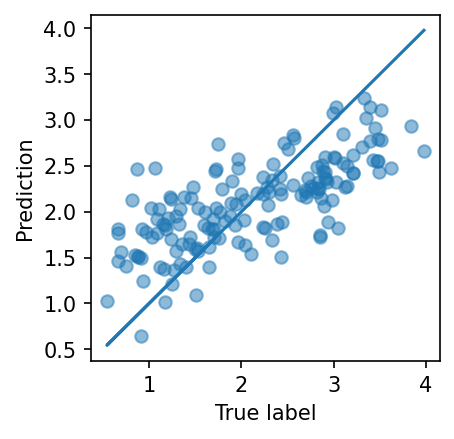

In [159]:
fig, ax = plt.subplots(dpi = 150, figsize = (3, 3))

ax.scatter(y_test, y_pred, alpha = 0.5)
ax.plot(y_test, y_test)
ax.set_xlabel('True label')
ax.set_ylabel('Prediction')

MSE(y_test, y_pred)

In [169]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10, random_state=42)

# feature scaling is not required for decision tree model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [170]:
MSE(y_pred, y_test)

0.11537652844303775

0.11537652844303775

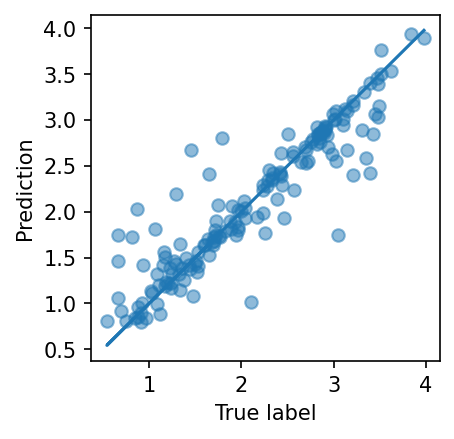

In [171]:
fig, ax = plt.subplots(dpi = 150, figsize = (3, 3))

ax.scatter(y_test, y_pred, alpha = 0.5)
ax.plot(y_test, y_test)
ax.set_xlabel('True label')
ax.set_ylabel('Prediction')

MSE(y_test, y_pred)

As you can see, Random Forest performs much better than Ridge Regression. The possible explanation is that the relationship between the features and the target property is non-linear. Consider Kernel Ridge regression for further comparison.

In [172]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred), abs(y_pred - y_test).mean()

0.8423758407463963

### Hyperparameters optimization

So far, we used the model with a predefined hyperparameters (such as n_estimators). However, these should be optimized to get a better performance.

<center><img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" height="300"></center>

In [174]:
from sklearn.model_selection import KFold
from tqdm import tqdm

kf = KFold(n_splits=5)
mse_models = []
n = np.array([1, 5, 10, 20, 30, 40, 50, 75, 100, 200])
for n_estimators in tqdm(n):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    mse_kfold = []
    for i, (train_index, val_index) in enumerate(kf.split(X_train)):
        X_train_inner = X_train.iloc[train_index]
        y_train_inner = y_train.iloc[train_index]
        X_val_inner = X_train.iloc[val_index]
        y_val_inner = y_train.iloc[val_index]
        
        model.fit(X_train_inner, y_train_inner)
        preds = model.predict(X_val_inner)
        mse_kfold.append(MSE(preds, y_val_inner))
    mse_models.append(np.mean(mse_kfold))

100%|██████████| 10/10 [00:26<00:00,  2.62s/it]


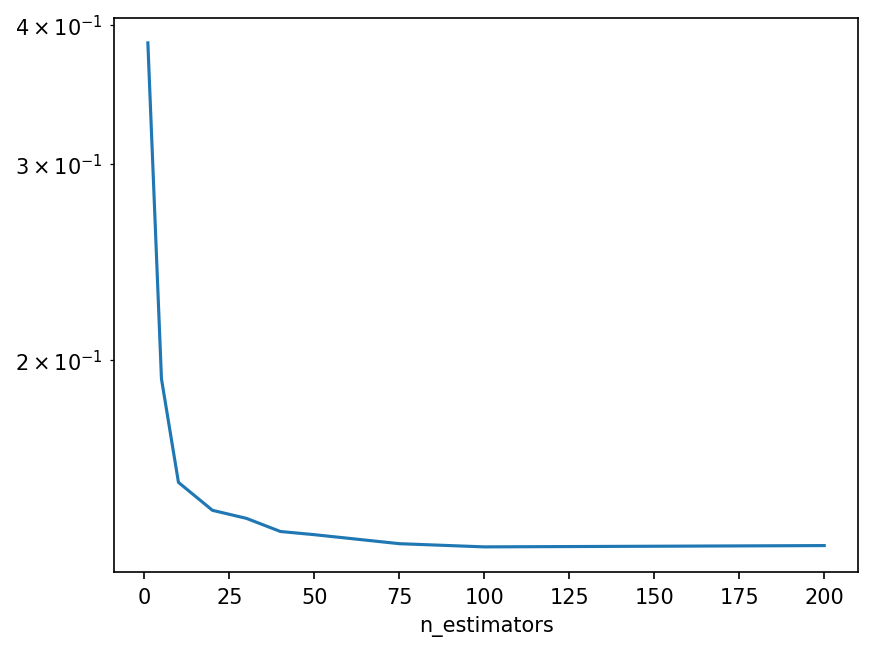

In [175]:
plt.figure(dpi = 150)
plt.plot(n, mse_models)
plt.xlabel('MSE')
plt.xlabel('n_estimators')
plt.yscale('log')

n_estimators >= 100  yields nearly the same 5-fold cross validation scores (may vary depending on the random_state)

It would be cost effective to use a smaller number of estimators if no dramatic gain in scores is observed.

In [181]:
mse_models = np.array(mse_models)
n[mse_models == mse_models.min()]

array([100])

In [182]:
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

0.30404132022359015

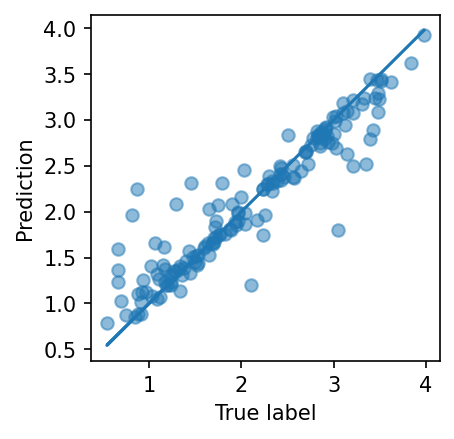

In [183]:
fig, ax = plt.subplots(dpi = 150, figsize = (3, 3))

ax.scatter(y_test, y_pred, alpha = 0.5)
ax.plot(y_test, y_test)
ax.set_xlabel('True label')
ax.set_ylabel('Prediction')

np.sqrt(MSE(y_test, y_pred))  # root mean squared error of Eg prediction

So we have an RMSE of 0.3 eV. Is that a good result? We can compare this result with the baseline predictor, which always predicts a median of the training data set.

In [209]:
baseline_prediction = np.mean(y_train)
np.sqrt(MSE(y_test, baseline_prediction)) 

0.8586894615301545

Our model predicts much better compred to the baseline model (RMSE: 0.3 vs 0.86 eV).

### Grid search

Random Forest regressors use several hyperparameters. To find the best settings for these parameters, one approach is grid search, which is demonstrated in the code below.

In [192]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# define parameters grid
parameters = {
    'n_estimators': [5, 25, 100],  
    'max_depth': [4, 8, 12],
    'max_features': ['sqrt', 'log2'],
}

rf = RandomForestRegressor(random_state=42)

# create model
grid = GridSearchCV(
    rf, 
    parameters, 
    cv = 5,
    scoring='neg_mean_squared_error', 
    n_jobs=-1, 
    verbose=1,
)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score (Negative MSE):", round(grid.best_score_, 4))
print("Best estimator:", grid.best_estimator_)

y_pred = grid.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"\nTest set performance:")
print(f"MSE: {test_mse:.4f}")
print(f"R-sqaured: {test_r2:.4f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 100}
Best cross-validation score (Negative MSE): -0.1645
Best estimator: RandomForestRegressor(max_depth=12, max_features='sqrt', random_state=42)

Test set performance:
MSE: 0.1189
R-sqaured: 0.8376


Grid search can be computationally expensive when exploring large parameter spaces. For more efficient alternatives, consider these approaches:

1. **Randomized Search**: Samples parameter combinations randomly
2. **Bayesian Optimization**: Uses probabilistic models to guide the search

3. **Halving Algorithms**: Progressively eliminates poor performers

Check out the [optuna](https://optuna.readthedocs.io/en/stable/) library.

In [210]:
!pip install optuna

In [211]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    """
    Objective function for Optuna to optimize
    """
    
    # Define hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    
    # Create model with suggested hyperparameters
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
        n_jobs=-1
    )
    
    # Evaluate using cross-validation
    score = cross_val_score(model, X_train, y_train, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    return score.mean()

# Create and run the study
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction='maximize')  # maximize negative MSE
study.optimize(objective, n_trials=100,)

print("Best trial:")
trial = study.best_trial
print(f"  Value (Negative MSE): {trial.value:.4f}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

Best trial:
  Value (Negative MSE): -0.1357
  Params: 
    n_estimators: 99
    max_depth: 18
    min_samples_split: 2
    min_samples_leaf: 1
    max_features: None
    bootstrap: True


In [205]:
best_model = RandomForestRegressor(**trial.params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

0.07329238376238563

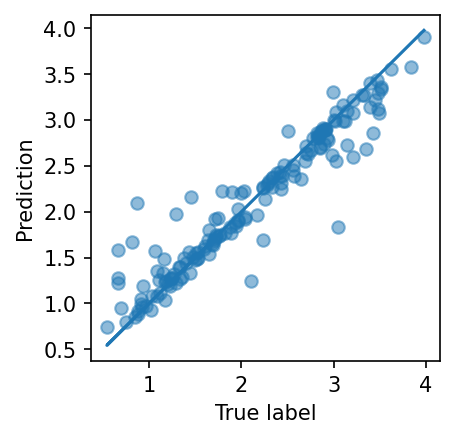

In [207]:
fig, ax = plt.subplots(dpi = 150, figsize = (3, 3))

ax.scatter(y_test, y_pred, alpha = 0.5)
ax.plot(y_test, y_test)
ax.set_xlabel('True label')
ax.set_ylabel('Prediction')

MSE(y_test, y_pred)  # root mean squared error of Eg prediction
